# Regression

While classification is the problem of predicting the class of given data points, **regression** is the problem of learning the strength of association between features of a dataset and continuous outcomes. A **continuous** outcome is a real value such as an integer or floating point value often quantified as amounts and sizes. Simply, regression attempts to learn how strong the relationship is between features and outcomes. Formally, regression approximates a mapping function **f** from input variables **X** to a continuos variable **y**. 

In statistics, regression is typically defined as a measurement that attempts to determine the strength of the relationship between one dependent variable and a series of other changing variables known as independent variables. For those of you familiar with regression, you can think of independent variables as features and dependent variables as outcomes or outcome variables in the machine learning idiom.

Since regression is used for predicting continous values, it can be referred to as **regression predictive modeling**. An algorithm capable of learning a regression predictive model is called a regression algorithm. Since regression predicts a quantity, *the performance must be measured as error* in those predictions.

Performance of machine learning regression can be gauged in many ways. But, the most common are mean square error (MSE), mean absolute error (MAE), and root mean squared error (RMSE).

**MSE** It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities. That is, when the dataset contains a lot of noise. It is most useful when the dataset contains outliers or unexpected values. Unexpected values are those that are too high or too low.

**MAE** is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is typically used when performance is measured on continuous variable data. It provides a linear value that averages the weighted individual differences equally.

**RMSE** errors are squared before they are averaged. As such, RMSE assigns a higher weight to larger errors. So, RMSE is much more useful when large errors are present and they drastically affect the model's performance. A benefit of RMSE is that units of error score are the same as the predicted value.

We need to set up the GPU for each notebook. So, click the **Runtime** tab, click **Change runtime type** from the drop-down menu, choose **GPU** from the Hardware Accelerator drop-down menu, and click **Save**.

In [3]:
import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.2.0', '/device:GPU:0')

# Boston Housing Dataset 

The first regression dataset we explore is Boston Housing. **Boston Housing** is a dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the machine learning literature to benchmark algorithms. The dataset is small in size with only 506 cases.

The name for this dataset is simply **boston**. It contains 12 features and 1 outcome (or target). The features are as follows:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. LSTAT - % lower status of the population

The target is:

* MEDV - median value of owner-occupied homes in $1000's

Data was collected in the '70s, so don't be shocked by the low median value of homes.

## Boston Data

You can access any dataset for this book directly from GitHub with a few simple steps:

1. visit the book URL: https://github.com/paperd/tensorflow
2. locate the dataset and click on it
3. click the **Raw** button
4. copy the URL to Colab and assign it to a variable
5. read the dataset with Pandas **read_csv** method

For convenience, we've already located the appropriate URL and assigned to a variable as so:

In [4]:
url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter6/data/boston.csv'

Read the dataset into a Pandas DataFrame:

In [5]:
import pandas as pd

data = pd.read_csv(url)

Verify that data was read properly:

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Explore the Dataset

Get datatypes:

In [7]:
data.dtypes

CRIM       float64
 ZN        float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

Get general information:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Get basic statistics:

In [9]:
data_t = data.describe()
data_t.T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Describe a specific feature:

In [10]:
data.describe().LSTAT

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Or:

In [11]:
data['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Get columns:

In [12]:
cols = list(data)
cols

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

## Create Feature and Target Sets

We need to create the feature set and target from the data, so let's do that now:

In [13]:
# create a copy of the DataFrame

df = data.copy()

# create the target

target = df.pop('MEDV')
print (target.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


Verify that feature set is as expected:

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


## Create a Statistics DataFrame

Create a DataFrame to hold statistics with the **describe** method and transpose it for easier viewing:

In [15]:
desc = df.describe()
desc = desc.transpose()
desc

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We can easily target specific stats from the new DataFrame:

In [16]:
desc[['mean', 'std']]

,mean,std
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


## Get Feature Names from the Features DataFrame

It is easy to get the features since the target is no longer part of the DataFrame:

In [17]:
feature_cols = list(df)
feature_cols

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

Get number of features:

In [18]:
len(feature_cols)

12

Or:

In [19]:
len(df.columns)

12

## Convert Features and Labels to Numpy

Convert Pandas DataFrame values to Numpy with the *values* method:

In [20]:
features = df.values
labels = target.values

type(features), type(labels)

(numpy.ndarray, numpy.ndarray)

## Split into train and test sets:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)

br = '\n'

print ('X_train shape:', end=' ')
print (X_train.shape, br)

print ('X_test shape:', end=' ')
print (X_test.shape)

X_train shape: (339, 12) 

X_test shape: (167, 12)


## Scale Data and Create TensorFlow Tensors

With image data, we scale by dividing each element by 255.0 to ensure that each input parameter (a pixel, in our case) has a similar data distribution. However, features represented by continous values are scaled differently. We rescale continuous data to have a mean (μ) of 0 and standard deviation (σ) of 1. A σ of 1 is called unit variance.

In [26]:
# scale feature image data and create TensorFlow tensors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

Let's view the first tensor:

In [27]:
def see_samples(data, num):
  for feat, targ in data.take(num):
    print ('Features: {}'.format(feat), br)
    print ('Target: {}'.format(targ))

n = 1
see_samples(train, n)

Features: [-0.40069293  0.54888872 -0.899201   -0.2697866  -1.13360708  0.43514224
  0.05150692  0.8106114  -0.63095801 -0.72342494  0.24982303 -0.73612695] 

Target: 23.9


The first sample looks exactly as we expect.

## Prepare Tensors for Training

In [30]:
# continue the input pipeline (prepare tensors for training)

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_bs = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_bs = test.batch(BATCH_SIZE).prefetch(1)

## Create a Model

If we don't have a lot of training data, one technique to avoid overfitting is to create a small network with few hidden layers. We do just that!

The 64 neuron input layer accommodates our 12 input features. We have one hidden layers with 64 neurons. The output layer has 1 neuron because we are using regression.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras
import numpy as np

# clear any previous model

keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

# notice input shape accommodates 12 features!

model = Sequential([
  Dense(64, activation='relu', input_shape=[12,]),
  Dense(64, activation='relu'),
  Dense(1)
])

## Compile the Model

In [32]:
rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(loss='mse', optimizer='RMSProp',
              metrics=[rmse, 'mae', 'mse'])

## Inspect the Model

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


Evaluation metrics used for regression differ from classification. Mean Squared Error (MSE) is a common loss function used for regression problems. Similarly,  A common regression metric is Mean Absolute Error (MAE). With some experimentation, we found that **RMSProp** performed pretty well with this dataset. Since this is a beginning book, fine tuning optimizers are not covered in depth.

## Train the Model

In [34]:
history = model.fit(train_bs, epochs=50,
                    validation_data=test_bs)

Epoch 1/50
22/22 [==============================] - 0s 10ms/step - loss: 528.5589 - root_mean_squared_error: 22.9904 - mae: 21.0277 - mse: 528.5589 - val_loss: 406.6022 - val_root_mean_squared_error: 20.1644 - val_mae: 18.1316 - val_mse: 406.6022
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 362.6086 - root_mean_squared_error: 19.0423 - mae: 16.9730 - mse: 362.6086 - val_loss: 246.1976 - val_root_mean_squared_error: 15.6907 - val_mae: 13.5108 - val_mse: 246.1976
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 200.5827 - root_mean_squared_error: 14.1627 - mae: 11.9269 - mse: 200.5827 - val_loss: 120.2619 - val_root_mean_squared_error: 10.9664 - val_mae: 8.8472 - val_mse: 120.2619
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 94.2878 - root_mean_squared_error: 9.7102 - mae: 7.6920 - mse: 94.2878 - val_loss: 68.1286 - val_root_mean_squared_error: 8.2540 - val_mae: 6.4018 - val_mse: 68.1286
Epoch 5/50
22/22 [======

## Visualize Training

Let's try a different technique to visualize. Begin by creating variable **hist** that holds the model's history as a Pandas DataFrame. Create another variable **hist['epoch']** to hold epoch history. Display the last five rows to get an idea about performance.

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,mae,mse,val_loss,val_root_mean_squared_error,val_mae,val_mse,epoch
45,7.315349,2.704690,1.977121,7.315349,17.950006,4.236745,3.156028,17.950006,45
46,7.335293,2.708375,1.943426,7.335293,17.692562,4.206253,3.096700,17.692562,46
47,7.255728,2.693646,1.956244,7.255728,16.520590,4.064553,2.978718,16.520590,47
48,7.021847,2.649877,1.935658,7.021847,17.392565,4.170439,3.157177,17.392565,48
49,7.082221,2.661244,1.938143,7.082221,16.429083,4.053280,2.989198,16.429083,49


Build the plots:

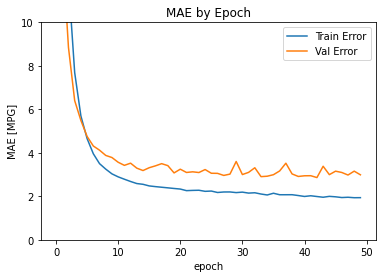

<Figure size 432x288 with 0 Axes>

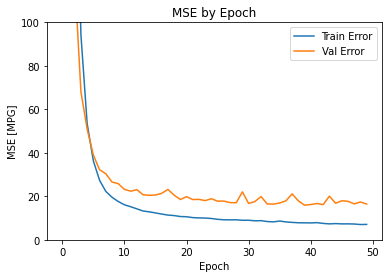

<Figure size 432x288 with 0 Axes>

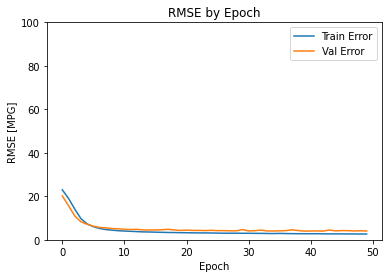

In [37]:
import matplotlib.pyplot as plt

def plot_history(history, limit1, limit2):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('MAE [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0, limit1])
  plt.legend()
  plt.title('MAE by Epoch')
  plt.show()

  plt.clf()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE [MPG]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0, limit2])
  plt.legend()
  plt.title('MSE by Epoch')
  plt.show()

  plt.clf()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RMSE [MPG]')
  plt.plot(hist['epoch'], hist['root_mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_root_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0, limit2])
  plt.legend()
  plt.title('RMSE by Epoch')
  plt.show()

# set limits to make plot readable

mae_limit, mse_limit = 10, 100
plot_history(history, mae_limit, mse_limit)

Since the validation error is a worse than the train error (for MAE and MSE at least), the model is overfitting. What can we do? The first step is to estimate when performance begins to degrade. From the visualizations, can you see when this happens?

## Early Stopping

With classification, our goal is to maximize accuracy. Of course, we can want to minimize loss. With regression, our goal is to minimize **MSE** or one of the other error metrics. From the visualizations, we can see that our model is overfitting because validation error is higher than training error. We can also see that once train and validation error cross, performance begins to degrade. 

There is one simple tuning experiment we can run to make this model more useful. We can stop the model when training and validation error are very close to each other. This technique is called early stopping. **Early stopping** is a widely used approach that stops training at the point when performance on a validation dataset starts to degrade.

Let's modify our training experiment to automatically stop training when the validation score doesn't improve. We use an **EarlyStopping** callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then training is automatically stopped.

All we need to do is update our fit() method and rerun training:

In [38]:
# clear the previous model

keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

# monitor 'val_loss' for early stopping

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss')

history = model.fit(train_bs, epochs=50,
                    validation_data=test_bs,
                    callbacks=[early_stop])

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 7.0236 - root_mean_squared_error: 2.6502 - mae: 1.9431 - mse: 7.0236 - val_loss: 17.5819 - val_root_mean_squared_error: 4.1931 - val_mae: 3.0974 - val_mse: 17.5819
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 7.0801 - root_mean_squared_error: 2.6609 - mae: 1.9250 - mse: 7.0801 - val_loss: 15.1304 - val_root_mean_squared_error: 3.8898 - val_mae: 2.8262 - val_mse: 15.1304
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 7.0006 - root_mean_squared_error: 2.6459 - mae: 1.9158 - mse: 7.0006 - val_loss: 15.9179 - val_root_mean_squared_error: 3.9897 - val_mae: 2.9463 - val_mse: 15.9179


Although we can get great results with early stopping, it is a good idea to add some control to ensure the best performance. For added control, we can add a parameter that forces the model to continue to a point that gives us the best performance. The **patience** parameter can be set to a given a number of epochs after which training will be stopped if there is no improvement. Let's try this and see what happens. 

In [39]:
# clear the previous model

keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

# set number of patience epochs

n = 4

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=n)

history = model.fit(train_bs, epochs=50,
                    validation_data=test_bs,
                    callbacks=[early_stop])

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 6.6984 - root_mean_squared_error: 2.5881 - mae: 1.8618 - mse: 6.6984 - val_loss: 17.5989 - val_root_mean_squared_error: 4.1951 - val_mae: 3.1331 - val_mse: 17.5989
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 6.8127 - root_mean_squared_error: 2.6101 - mae: 1.9004 - mse: 6.8127 - val_loss: 15.6439 - val_root_mean_squared_error: 3.9552 - val_mae: 2.8909 - val_mse: 15.6439
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 6.7614 - root_mean_squared_error: 2.6003 - mae: 1.8592 - mse: 6.7614 - val_loss: 14.9963 - val_root_mean_squared_error: 3.8725 - val_mae: 2.8259 - val_mse: 14.9963
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 6.7706 - root_mean_squared_error: 2.6020 - mae: 1.9000 - mse: 6.7706 - val_loss: 16.0421 - val_root_mean_squared_error: 4.0053 - val_mae: 2.9519 - val_mse: 16.0421
Epoch 5/50
22/22 [==============================] - 0s 4

Now, we have a better model because it stops closer to the ideal performance.

Let's plot:

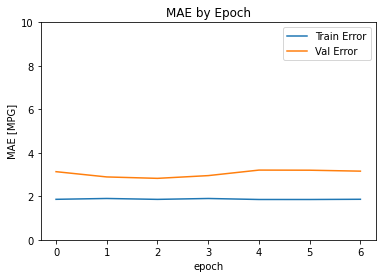

<Figure size 432x288 with 0 Axes>

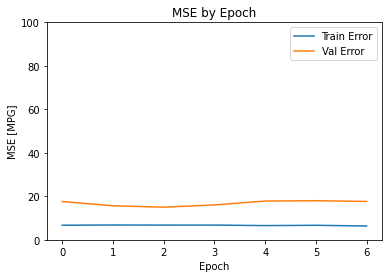

<Figure size 432x288 with 0 Axes>

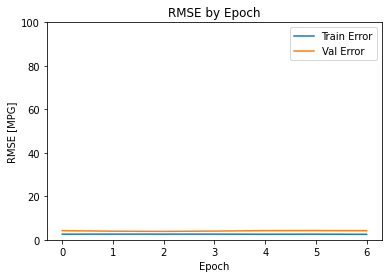

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

train_limit, test_limit = 10, 100

plot_history(history, train_limit, test_limit)

## Remove Bad Data

Although early stopping worked as expected, we might be able to squeeze out a bit more performance with this dataset. The boston dataset has some bad data so we can modify it.

What is wrong with the data? Prices of homes is capped at $50,000 because the Census Service censored the data. They decided to set the maximum value of the price variable to 50k USD, so no price can go beyond that value.

What do we do? While maybe not ideal, we can remove data with prices at or above 50k USD. This is not ideal because we may be removing perfectly good data, but there is no way to know this. Another reason is because the dataset is so small to begin with. Neural nets are meant to perform at their best with larger datasets.

Keep in mind that our book is an introduction, so we are not nearly as concerned with performance as we would be if working on real datasets. We are just trying to help you learn how to use TensorFlow 2.x. If you want to explore this topic further, we recommend this URL:

https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

## Get Data

To make this happen, we have to return to the original data because we've processed the heck out of it to ready it for TensorFlow consumption. So let's get started: 

In [41]:
# get the data

url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter6/data/boston.csv'

boston = pd.read_csv(url)

Verify data:

In [42]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Remove Noise

In [43]:
print ('data set before removing noise:', boston.shape)

# remove noise

noise = boston.loc[boston['MEDV'] >= 50]
data = boston.drop(noise.index)

print ('data set without noise:', data.shape)

data set before removing noise: (506, 13)
data set without noise: (490, 13)


## Create Target Data

So, we now have a dataset without the possibly corrupted data. Now, let's create an input pipeline like before and model the new dataset. First, we need to split target data from the DataFrame:

In [45]:
# create a copy of the DataFrame

df = data.copy()

# create the target

target = df.pop('MEDV')
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Transform Data

Transform DataFrame into NumPy:

In [46]:
features = df.values
labels = target.values

## Create Train and Test Data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)

# standardize feature image data and create TensorFlow tensors

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## Transform Data for the Input Pipeline

In [50]:
train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

## Continue Building the Input Pipeline

In [52]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_n = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_n = test.batch(BATCH_SIZE).prefetch(1)

## Train the Model

Let's reuse the model that we've already created and compiled. We just need to clear memory and retrain with the data with noise removed.

In [53]:
keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

history = model.fit(train_n, epochs=50,
                    validation_data=test_n)

Epoch 1/50
21/21 [==============================] - 0s 5ms/step - loss: 6.2805 - root_mean_squared_error: 2.5061 - mae: 1.8838 - mse: 6.2805 - val_loss: 11.9465 - val_root_mean_squared_error: 3.4564 - val_mae: 2.5133 - val_mse: 11.9465
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 5.2857 - root_mean_squared_error: 2.2991 - mae: 1.7696 - mse: 5.2857 - val_loss: 11.7030 - val_root_mean_squared_error: 3.4210 - val_mae: 2.4732 - val_mse: 11.7030
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 5.2978 - root_mean_squared_error: 2.3017 - mae: 1.7887 - mse: 5.2978 - val_loss: 12.5329 - val_root_mean_squared_error: 3.5402 - val_mae: 2.5919 - val_mse: 12.5329
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 5.0758 - root_mean_squared_error: 2.2529 - mae: 1.7180 - mse: 5.0758 - val_loss: 15.9265 - val_root_mean_squared_error: 3.9908 - val_mae: 3.0069 - val_mse: 15.9265
Epoch 5/50
21/21 [==============================] - 0s 3

## Let's Visualize

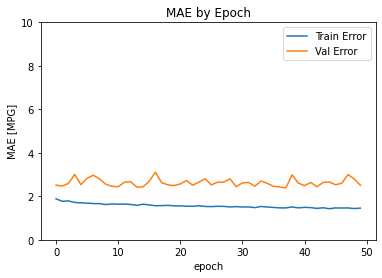

<Figure size 432x288 with 0 Axes>

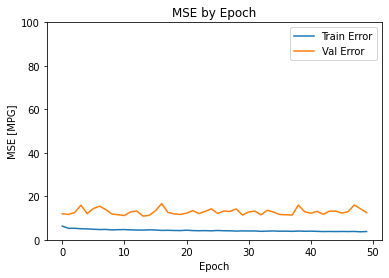

<Figure size 432x288 with 0 Axes>

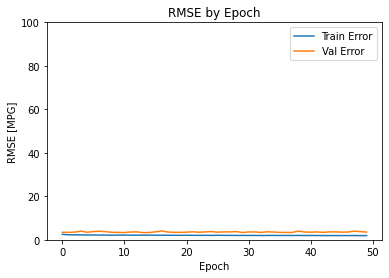

In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

train_limit, test_limit = 10, 100

plot_history(history, train_limit, test_limit)

It looks like we get the best performance very early on. Notice that performance doesn't really improve or degrade that much no matter how many epochs we use. So, let's use early stopping.

## Train the Model

Let's reuse the model that we've already created and compiled. We just need to clear memory and retrain with the data with noise removed.

In [55]:
keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

n = 4

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=n)

history = model.fit(train_n, epochs=50,
                    validation_data=test_n,
                    callbacks=[early_stop])

Epoch 1/50
21/21 [==============================] - 0s 5ms/step - loss: 3.6376 - root_mean_squared_error: 1.9073 - mae: 1.4195 - mse: 3.6376 - val_loss: 16.3366 - val_root_mean_squared_error: 4.0419 - val_mae: 3.0625 - val_mse: 16.3366
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 3.6827 - root_mean_squared_error: 1.9190 - mae: 1.4418 - mse: 3.6827 - val_loss: 14.2375 - val_root_mean_squared_error: 3.7733 - val_mae: 2.7575 - val_mse: 14.2375
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 3.7284 - root_mean_squared_error: 1.9309 - mae: 1.4578 - mse: 3.7284 - val_loss: 11.9917 - val_root_mean_squared_error: 3.4629 - val_mae: 2.4695 - val_mse: 11.9917
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 3.5708 - root_mean_squared_error: 1.8896 - mae: 1.4142 - mse: 3.5708 - val_loss: 11.9833 - val_root_mean_squared_error: 3.4617 - val_mae: 2.4768 - val_mse: 11.9833
Epoch 5/50
21/21 [==============================] - 0s 4

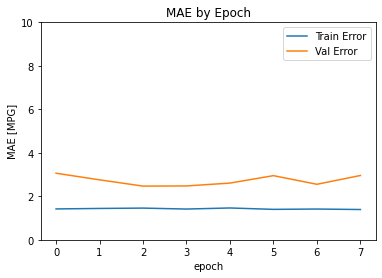

<Figure size 432x288 with 0 Axes>

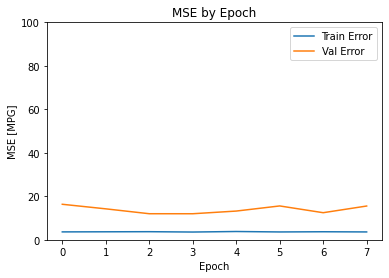

<Figure size 432x288 with 0 Axes>

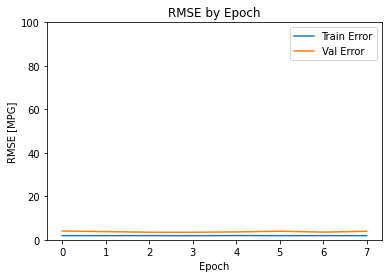

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

train_limit, test_limit = 10, 100

plot_history(history, train_limit, test_limit)

Our model is not perfect, be we did improve performance. Of course, there are many advanced techniques that can be employed to further improve performance, but then we move into advanced terrritory.

## Generalize on Test Data

Let's see how well the model generalizes with test data, which tells us how well we can expect the model to predict when we use it in the real world.

In [57]:
loss, rmse, mae, mse = model.evaluate(test_n, verbose=2)

print ()

print('"Testing set Mean Abs Error: {:5.2f} thousand dollars'.format(mae))

11/11 - 0s - loss: 15.5342 - root_mean_squared_error: 3.9413 - mae: 2.9579 - mse: 15.5342

"Testing set Mean Abs Error:  2.96 thousand dollars


As we know, Mean Square Error (MSE) is a common loss function used for regression problems. Another common regression metric is Mean Absolute Error (MAE). MAE gives us a good idea how well our model performed in an easy to understand way. So, we can expect that our model predictions are off by the MAE value in thousands of dollars.

## Make Predictions

In [58]:
predictions = model.predict(test_n)

## Display the First Prediction

In [59]:
# predicted housing price

first = predictions[0]
print ('predicted price:', first[0], 'thousand')

# actual housing price

print ('actual price:', y_test[0], 'thousand')

predicted price: 18.687223 thousand
actual price: 24.3 thousand


## Display the First Five Predictions

In [60]:
five = predictions[:5]
print (five, br)

actuals = y_test[:5]
print (actuals)

[[18.687223]
 [26.217735]
 [17.316042]
 [19.695024]
 [18.076483]] 

[24.3 32.5 17.8 19.5 19.9]


## Visualize Predictions

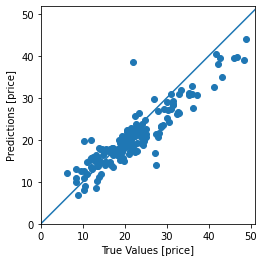

In [61]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

The further a prediciton is away from the diagonal (true values), the more erroneous it is. 

# Load Boston Data from Scikit-Learn

Since the Boston dataset is included in **sklearn.datasets**, let's load it from this environment. 

In [62]:
from sklearn import datasets

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target

It's easier to load because we don't have to access a CSV file. On the downside, the data is not loaded as a DataFrame. But, we can create a DataFrame with a few simple steps.

## Build a DataFrame from a **sklearn** dataset

First, access information about the dataset with the **keys()** function.

In [63]:
dataset.keys() 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Second, access the feature names.

In [64]:
feature_names = dataset.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Third, build a dataframe with feature data.

In [65]:
df_sklearn = pd.DataFrame(dataset.data, columns=feature_names)
df_sklearn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Notice that the SKLEARN dataset has an additional column **B**. The B column is a bit controversial because it represents African American (or Black) people in a township.

Fourth, add target data.

In [66]:
df_sklearn['MEDV'] = dataset.target
df_sklearn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Remove Noise

In [68]:
# remove noisy data

print ('data set before removing noise:', df_sklearn.shape)

noise = df_sklearn.loc[df_sklearn['MEDV'] >= 50]
df_clean = df_sklearn.drop(noise.index)

print ('data set without noise:', df_clean.shape)

data set before removing noise: (506, 14)
data set without noise: (490, 14)


## Create Target

In [70]:
# create a copy of the DataFrame

df = df_clean.copy()

# create the target

target = df.pop('MEDV')
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Transform Data

In [71]:
features = df.values
labels = target.values

## Create Train and Test Data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)


X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## Transform Data for the Input Pipeline

In [75]:
train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

## Continue Building the Input Pipeline

In [77]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_sk = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_sk = test.batch(BATCH_SIZE).prefetch(1)

## Create a New Model and Compile

You may not have noticed, but the **sklearn** boston dataset has an extra feature column. So, we can either remove the feature or create a new model that accommodates it. Let's just create a new model and compile. Notice that we changed the input shape to accommodate the extra feature.

In [78]:
# clear any previous model

keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

# new model with 13 input features

model = Sequential([
  Dense(64, activation='relu', input_shape=[13,]),
  Dense(64, activation='relu'),
  Dense(1)
])

# compile the new model

model.compile(loss='mse', optimizer='RMSProp',
              metrics=['mae', 'mse'])

## Train Data

In [79]:
n = 4

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=n)

history = model.fit(train_sk, epochs=50,
                    validation_data=test_sk,
                    callbacks=[early_stop])

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 444.8763 - mae: 19.6456 - mse: 444.8763 - val_loss: 413.4243 - val_mae: 18.3210 - val_mse: 413.4243
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 304.5066 - mae: 15.8733 - mse: 304.5066 - val_loss: 267.4167 - val_mae: 14.1076 - val_mse: 267.4167
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 168.0415 - mae: 11.4047 - mse: 168.0415 - val_loss: 138.2882 - val_mae: 9.6074 - val_mse: 138.2882
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 75.9102 - mae: 7.3573 - mse: 75.9102 - val_loss: 70.4388 - val_mae: 6.7686 - val_mse: 70.4388
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 40.3686 - mae: 5.2175 - mse: 40.3686 - val_loss: 44.8567 - val_mae: 5.3682 - val_mse: 44.8567
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 26.2057 - mae: 4.1271 - mse: 26.2057 - val_loss: 33.4894 - val_mae: 4.5764 - val_

# Read from UCI Irvine Machine Learning Repository

We can also read housing data directly from the UCI Irvine Machine Learning Repository.

In [82]:
dataset_path = keras.utils.get_file('housing.data', 'https://archive.ics.uci.\
edu/ml/machine-learning-databases/housing/housing.data')
dataset_path

'/root/.keras/datasets/housing.data'

In [83]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
 
uci_data = pd.read_csv(dataset_path, names=cols, sep=' ',
                       skipinitialspace=True)

uci_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


## Create the Input Pipeline

In [85]:
# create a copy of the DataFrame

df = uci_data.copy()

# create the target

target = df.pop('MEDV')

# prepare features and labels

features = df.values
labels = target.values

# create and train and test data

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)

# scale data

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# prepare train and test data for TensorFlow consumption

train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

# shuffle, batch, and prefetch

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_ml = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_ml = test.batch(BATCH_SIZE).prefetch(1)

## Model Data

In [86]:
# clear any previous model

keras.backend.clear_session()

# plant a random seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

# new model with 13 input features

model = Sequential([
  Dense(64, activation='relu', input_shape=[13,]),
  Dense(64, activation='relu'),
  Dense(1)
])

# compile the new model

model.compile(loss='mse', optimizer='RMSProp',
              metrics=['mae', 'mse'])

## Train

In [87]:
n = 4

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=n)

history = model.fit(train_ml, epochs=50,
                    validation_data=test_ml,
                    callbacks=[early_stop])

Epoch 1/50
22/22 [==============================] - 0s 6ms/step - loss: 529.4684 - mae: 20.9925 - mse: 529.4684 - val_loss: 412.6105 - val_mae: 18.1396 - val_mse: 412.6105
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 370.8401 - mae: 17.0552 - mse: 370.8401 - val_loss: 253.0599 - val_mae: 13.6809 - val_mse: 253.0599
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 205.0551 - mae: 12.0279 - mse: 205.0551 - val_loss: 123.8565 - val_mae: 9.0109 - val_mse: 123.8565
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 95.3930 - mae: 7.7161 - mse: 95.3930 - val_loss: 68.3160 - val_mae: 6.4573 - val_mse: 68.3160
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 53.8578 - mae: 5.7827 - mse: 53.8578 - val_loss: 52.3218 - val_mae: 5.5267 - val_mse: 52.3218
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 37.2778 - mae: 4.6735 - mse: 37.2778 - val_loss: 39.7947 - val_mae: 4.7499 - val_

# Model the Cars Dataset

To get more practice, let's try another dataset.

## Get Cars Data from GitHub

You can access any free standing dataset for this book directly from GitHub with a few simple steps:

1.	visit the book URL: https://github.com/paperd/tensorflow
2.	locate the dataset and click on it
3.	click the Raw button
4.	copy the URL to Colab and assign it to a variable
5.	read the dataset with the Pandas read_csv method

We’ve already located the URL and assigned it to a variable:

In [88]:
url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter6/data/cars.csv'

Read the dataset into a Pandas DataFrame:

In [89]:
cars = pd.read_csv(url)

Verify data:

In [90]:
cars.head()

,Car,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


Get information about dataset:

In [91]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   HP            406 non-null    int64  
 5   Weight        406 non-null    int64  
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.7+ KB


## Slice Extraneous Data

Since the name of each car has no impact on any predictions we might want to make, we can tuck it away into its own DataFrame in case we want to revisit it in the future. 

In [93]:
try:
  name = cars.pop('Car')
except:
  print("An exception occurred")

An exception occurred


If an exception occurred, the *Car* column has already been removed.

## Convert Categorical Column to Numeric 

Machine learning algorithms can only train numeric data. So, we must convert any non-numeric feature. The 'Origin' column is categorical, not numeric. To remedy, one solution is to encode the data as *one-hot*. **One hot encoding** is a process that converts categorical data into a numeric form for machine learning algorithm consumption.

We start by slicing off the 'Origin' feature column from the original DataFrame into its own DataFrame. We then use this DataFrame as a template to build a new feature column in the original DataFrame for each category from the original 'Origin' feature.

In [95]:
# create a copy of DataFrame

df = cars.copy()

origin = df.pop('Origin')

Now, we define a feature column for 'US', 'Europe', and 'Japan' cars:

In [96]:
df['US'] = (origin == 'US') * 1.0
df['Europe'] = (origin == 'Europe') * 1.0
df['Japan'] = (origin == 'Japan') * 1.0
df.head()

,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,US,Europe,Japan
0,18.0,8,307.0,130,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140,3449,10.5,70,1.0,0.0,0.0


So, for each entry in the 'US' feature column, we assign a '1.0' if the car is from the United States. Otherwise, we assign a '0.0'. We follow the same logic for the 'Europe' and 'Japan' feature columns based on the car's origin. Now, the algorithm can process the data properly.

## Create Features and Labels

Our goal is to predict 'MPG' for cars in this dataset. So, the target is 'MPG' and features are the remaining feature columns.

## Create Target

In [102]:
# create a copy

features = df.copy()

target = features.pop('MPG')

## Get Number of Features

In [103]:
# get features

feature_cols = list(features)
print (feature_cols, br)

# get number of features

num_features = len(feature_cols)
print (num_features)

['Cylinders', 'Displacement', 'HP', 'Weight', 'Acceleration', 'Model', 'US', 'Europe', 'Japan'] 

9


## Create Data for TensorFlow Consumption

In [104]:
# convert feature and target data to float

features = features.values
print (type(features), br)

labels = target.values
print (type(labels))

<class 'numpy.ndarray'> 

<class 'numpy.ndarray'>


## Split Data into Train and Test Sets and Scale

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)

print ('X_train shape:', end=' ')
print (X_train.shape, br)

print ('X_test shape:', end=' ')
print (X_test.shape)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

X_train shape: (272, 9) 

X_test shape: (134, 9)


## Transform Data for the Input Pipeline

In [108]:
train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

## Shuffle (where appropriate), Batch, and Prefetch

In [110]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_cars = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_cars = test.batch(BATCH_SIZE).prefetch(1)

## Create the Model

In [120]:
# clear any previous model

keras.backend.clear_session()

# create the model

model = Sequential([
  Dense(64, activation='relu', input_shape=[num_features]),
  Dense(64, activation='relu'),
  Dense(1)
])

## Compile the Model

In [121]:
rmse = tf.keras.metrics.RootMeanSquaredError()
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=[rmse, 'mae', 'mse'])

## Inspect the Model

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [123]:
history = model.fit(train_cars, epochs=100,
                    validation_data=test_cars,
                    callbacks=[early_stop])

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 530.3841 - root_mean_squared_error: 23.0301 - mae: 21.6267 - mse: 530.3841 - val_loss: 484.3900 - val_root_mean_squared_error: 22.0089 - val_mae: 20.3084 - val_mse: 484.3900
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 422.5585 - root_mean_squared_error: 20.5562 - mae: 19.1417 - mse: 422.5585 - val_loss: 371.8039 - val_root_mean_squared_error: 19.2822 - val_mae: 17.7143 - val_mse: 371.8039
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 303.9154 - root_mean_squared_error: 17.4332 - mae: 16.0349 - mse: 303.9154 - val_loss: 247.3068 - val_root_mean_squared_error: 15.7260 - val_mae: 14.2600 - val_mse: 247.3068
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 184.6398 - root_mean_squared_error: 13.5882 - mae: 12.1395 - mse: 184.6398 - val_loss: 139.8950 - val_root_mean_squared_error: 11.8277 - val_mae: 10.4483 - val_mse: 139.8950
Epoch 5/100


## Visualize Training

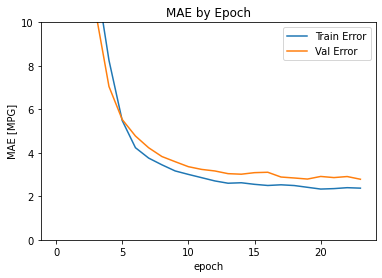

<Figure size 432x288 with 0 Axes>

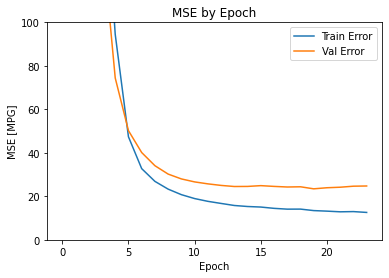

<Figure size 432x288 with 0 Axes>

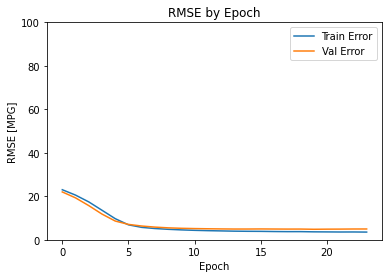

In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

train_limit, test_limit = 10, 100

plot_history(history, train_limit, test_limit)

## Improve Model by Tweaking Early Stopping

In [125]:
keras.backend.clear_session()

n = 4

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=n)

history = model.fit(train_cars, epochs=100,
                    validation_data=test_cars,
                    callbacks=[early_stop])

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 12.4704 - root_mean_squared_error: 3.5314 - mae: 2.3378 - mse: 12.4704 - val_loss: 23.7506 - val_root_mean_squared_error: 4.8735 - val_mae: 2.7887 - val_mse: 23.7506
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 12.2229 - root_mean_squared_error: 3.4961 - mae: 2.2921 - mse: 12.2229 - val_loss: 23.5241 - val_root_mean_squared_error: 4.8502 - val_mae: 2.7752 - val_mse: 23.5241
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 12.1176 - root_mean_squared_error: 3.4810 - mae: 2.3346 - mse: 12.1176 - val_loss: 23.6982 - val_root_mean_squared_error: 4.8681 - val_mae: 2.7182 - val_mse: 23.6982
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 11.8793 - root_mean_squared_error: 3.4466 - mae: 2.3227 - mse: 11.8793 - val_loss: 24.9347 - val_root_mean_squared_error: 4.9935 - val_mae: 2.8161 - val_mse: 24.9347
Epoch 5/100
17/17 [=========================

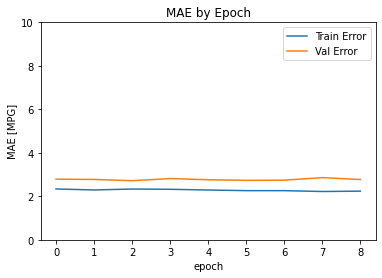

<Figure size 432x288 with 0 Axes>

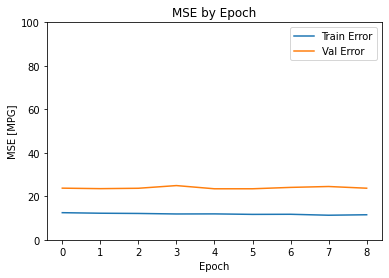

<Figure size 432x288 with 0 Axes>

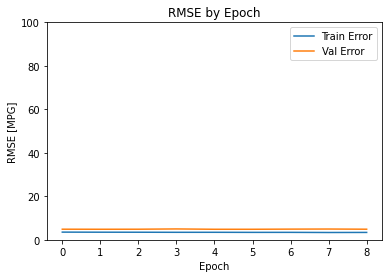

In [126]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

train_limit, test_limit = 10, 100

plot_history(history, train_limit, test_limit)

## Generalize on Test Data

In [127]:
loss, rmse, mae, mse = model.evaluate(test_cars, verbose=2)

print ()

print('"Testing set Mean Abs Error: {:5.2f} MPG'.format(mae))

9/9 - 0s - loss: 23.7261 - root_mean_squared_error: 4.8709 - mae: 2.7722 - mse: 23.7261

"Testing set Mean Abs Error:  2.77 MPG


## Make Predictions

In [128]:
predictions = model.predict(test_cars)

## Visualize Predictions

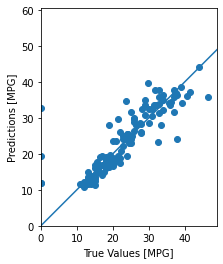

In [129]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Read from UCI Irvine Machine Learning Repository

We can also read car data directly from the UCI Irvine Machine Learning Repository.

In [133]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.\
edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

# Get Data into Pandas

In [134]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

uci_cars = pd.read_csv(dataset_path, names=column_names,
                       na_values = '?', comment='\t',
                       sep=' ', skipinitialspace=True)

uci_cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
